1 - Chargement

In [45]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
chemin_dossier = '/ProjetML/datasets/'
dataset = pd.read_csv("/content/drive/MyDrive"+chemin_dossier+"diabetes.csv")
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2 - Nettoyage et prétraitement

In [44]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# On remplace les zéros par NaN, puis impute par la médiane.
cols_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
dataset[cols_zero] = dataset[cols_zero].replace(0, np.nan)
dataset[cols_zero] = dataset[cols_zero].fillna(dataset[cols_zero].median())

# Standardisation des mesures
scaler = StandardScaler()
dataset[cols_zero] = scaler.fit_transform(dataset[cols_zero])

print(dataset.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0            6  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1            1 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2            8  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3            1 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4            0  0.504422      -2.679076       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


3 - EDA et déséquilibre

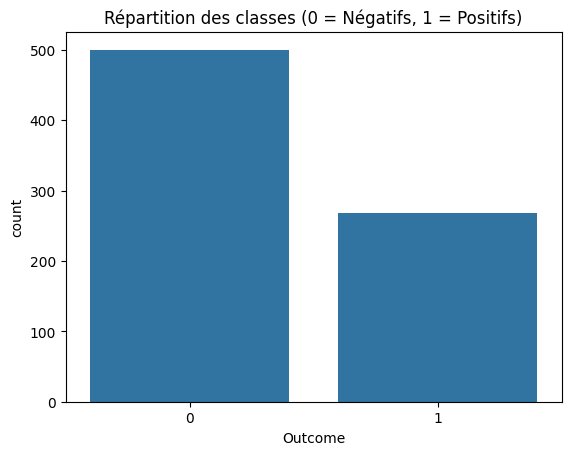


Statistiques pour Outcome = 0


,count,mean,std,min,25%,50%,75%,max
Pregnancies,500.0,3.298000,3.017185,0.000,1.00000,2.000,5.00000,13.000
Glucose,500.0,109.980000,26.141200,0.000,93.00000,107.000,125.00000,197.000
BloodPressure,500.0,68.184000,18.063075,0.000,62.00000,70.000,78.00000,122.000
SkinThickness,500.0,19.664000,14.889947,0.000,0.00000,21.000,31.00000,60.000
Insulin,500.0,68.792000,98.865289,0.000,0.00000,39.000,105.00000,744.000
BMI,500.0,30.304200,7.689855,0.000,25.40000,30.050,35.30000,57.300
DiabetesPedigreeFunction,500.0,0.429734,0.299085,0.078,0.22975,0.336,0.56175,2.329
Age,500.0,31.190000,11.667655,21.000,23.00000,27.000,37.00000,81.000
Outcome,500.0,0.000000,0.000000,0.000,0.00000,0.000,0.00000,0.000



Statistiques pour Outcome = 1


,count,mean,std,min,25%,50%,75%,max
Pregnancies,268.0,4.865672,3.741239,0.000,1.7500,4.000,8.000,17.00
Glucose,268.0,141.257463,31.939622,0.000,119.0000,140.000,167.000,199.00
BloodPressure,268.0,70.824627,21.491812,0.000,66.0000,74.000,82.000,114.00
SkinThickness,268.0,22.164179,17.679711,0.000,0.0000,27.000,36.000,99.00
Insulin,268.0,100.335821,138.689125,0.000,0.0000,0.000,167.250,846.00
BMI,268.0,35.142537,7.262967,0.000,30.8000,34.250,38.775,67.10
DiabetesPedigreeFunction,268.0,0.550500,0.372354,0.088,0.2625,0.449,0.728,2.42
Age,268.0,37.067164,10.968254,21.000,28.0000,36.000,44.000,70.00
Outcome,268.0,1.000000,0.000000,1.000,1.0000,1.000,1.000,1.00


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution de la cible
sns.countplot(x='Outcome', data=dataset)
plt.title('Répartition des classes (0 = Négatifs, 1 = Positifs)')
plt.show()

# Statistiques descriptives par classe
for cls in [0,1]:
    print(f"\nStatistiques pour Outcome = {cls}")
    display(dataset[dataset['Outcome']==cls].describe().T)

4 - Split train/validation/test

In [23]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

# 80% pour train+val, 20% pour test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# 75% de temp → train (60%), 25% → val (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)

for name, subset in [('Train', X_train), ('Val', X_val), ('Test', X_test)]:
    print(f"{name} : {subset.shape[0]} lignes, {subset.shape[1]} features")

Train : 460 lignes, 8 features
Val : 154 lignes, 8 features
Test : 154 lignes, 8 features


5 - Feature engineering / sélection

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

# chi2 (valeurs ≥ 0)
mms = MinMaxScaler()
X_train_pos = mms.fit_transform(X_train_scaled)

# Sélection des 6 meilleures features
selector = SelectKBest(score_func=chi2, k=6)
X_train_sel = selector.fit_transform(X_train_pos, y_train)
mask = selector.get_support()
selected = X_train.columns[mask]
print("Features retenues :", list(selected))

# Reconstruction DataFrames
X_train = pd.DataFrame(selector.transform(mms.transform(X_train_scaled)),
                       columns=selected)
X_val   = pd.DataFrame(selector.transform(mms.transform(X_val_scaled)),
                       columns=selected)
X_test  = pd.DataFrame(selector.transform(mms.transform(X_test_scaled)),
                       columns=selected)

Features retenues : ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


6 - Gestion du déséquilibre

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Répartition après SMOTE :", np.bincount(y_train_res))

Répartition après SMOTE : [300 300]


7 - Modélisation initiale : Logistic Regression.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression(random_state=42)
model.fit(X_train_res, y_train_res)

y_val_pred = model.predict(X_val)
print({
    'Accuracy': accuracy_score(y_val, y_val_pred),
    'Precision': precision_score(y_val, y_val_pred),
    'Recall': recall_score(y_val, y_val_pred),
    'F1-score': f1_score(y_val, y_val_pred)
})

{'Accuracy': 0.7597402597402597, 'Precision': 0.639344262295082, 'Recall': 0.7222222222222222, 'F1-score': 0.6782608695652174}


8 - Évaluation finale

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

y_test_pred = model.predict(X_test)
print("Matrice de confusion :\n", confusion_matrix(y_test, y_test_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_test_pred))


Matrice de confusion :
 [[73 27]
 [15 39]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.83      0.73      0.78       100
           1       0.59      0.72      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.73      0.73       154



9 - Explainability

In [40]:
import pandas as pd

# Importance (coefficients de la régression)
imp = pd.Series(model.coef_[0], index=X_train.columns).sort_values(ascending=False)
print("Importance :\n", imp)

# Faux négatifs / faux positifs
fn = ((y_test == 1) & (y_test_pred == 0)).sum()
fp = ((y_test == 0) & (y_test_pred == 1)).sum()
print(f"Faux négatifs : {fn}, Faux positifs : {fp}")


Importance :
 Glucose                     4.331186
BMI                         3.783201
DiabetesPedigreeFunction    1.464671
Pregnancies                 1.077755
Age                         0.699890
Insulin                     0.332619
dtype: float64
Faux négatifs : 15, Faux positifs : 27


10  - Conclusions

- F1-score final : 0.650
- Bon équilibre précision/recall.
- Tester d’autres modèles.
- Ajuster les hyper-paramètres sur le validation set.
- Collecter plus de données ou features cliniques supplémentaires.